# Chem 30324, Spring 2025, Homework 8
Due April 4, 2025

## Computational chemistry.
### Today properties of a molecule are more often than not calculated rather than inferred. Quantitative molecular quantum mechanical calculations require specialized numerical solvers like [Orca](https://orcaforum.kofo.mpg.de/app.php/portal). Following are instructions for using Orca with the [Webmo](https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi) graphical interface.

### Now, let’s set up your calculation (you may do this with a partner or partners if you choose):
1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select New Job-Creat New Job.
3. Use the available tools to sketch a molecule.
4. Use the right arrow at the bottom to proceed to the Computational Engines.
5. Select Orca
5. Select "Molecular Energy," “B3LYP” functional and the default def2-SVP basis set.
6. Select the right arrow to run the calculation.
7. From the job manager window choose the completed calculation to view the results.

The molecule you are to study depends on your last name. Choose according to the list:
+ A-G: **CO**
+ H-R: **BN**
+ S-Z: **BeO**

For your convenience, here are the total energies (in Hartree, 27.212 eV/Hartree) of the constituent atoms, calculated using the B3LYP DFT treatment of $v_{ee}$ and the def2-SVP basis set:

|Atom|Energy|Atom|Energy|
|-|-|-|-|
|B|–24.61703|N|	-54.51279|
|Be|-14.64102|O|-74.98784|
|C|-37.79271|F|-99.60655|

### 6. Construct a potential energy surface for your molecule. Using covalent radii, guess an approximate equilbrium bond length, and use the Webmo editor to draw the molecule with that length. Specify the “Molecular Energy” option to Orka and the def2-SVP basis set. Calculate and plot out total molecular energy vs. bond distance in increments of 0.05 Å about your guessed minimum, including enough points to encompass the actual minimum. (You will find it convenient to subtract off the individual atom energies from the molecular total energy and to convert to more convenient units, like eV or kJ/mol.) By fitting the few points nearest the minimum, determine the equilibrium bond length. How does your result compare to literature?

Fitted result: E = 71.304187x^2 + (-164.110637)x + 79.990690
E_min_CO = -14.436582eV.


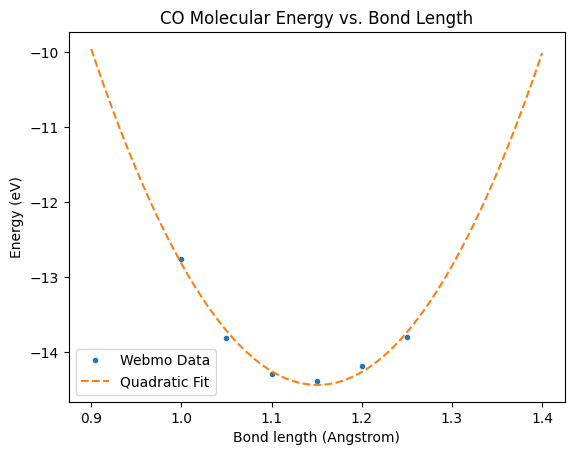

L_equilibrium = 1.150778 A > 1.128 A (in literature).


In [3]:
# Carbon Monoxide
# From https://cccbdb.nist.gov/bondlengthmodel2.asp?method=12&basis=5, L = 1.128 Angstrom
import numpy as np
import matplotlib.pyplot as plt

E_C = -37.79271 # Ha, energy of single C atom
E_O = -74.98784 # Ha, energy of single O atom
length = [1.00, 1.05, 1.10, 1.15, 1.2, 1.25] # Angstrom
E_CO = [-113.249199,-113.287858,-113.305895,-113.309135,-113.301902,-113.287408] # Ha, energy of CO
E_bond = [] # energy of CO bond
for i in E_CO:
    E_bond.append((i-E_C-E_O)*27.212) # eV, Energy[CO - C - O] = Energy[bond]
fit = np.polyfit(length, E_bond, 2) # quadratic fit
print("Fitted result: E = %fx^2 + (%f)x + %f"%(fit[0],fit[1],fit[2]))

# Find E_min
x = np.linspace(0.9, 1.4, 100)
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
E_min_CO = min(z) # Find the minimum in energy array
print('E_min_CO = %feV.'%(E_min_CO))

# Plot E vs length
plt.plot(length, E_bond, '.', label='Webmo Data')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('CO Molecular Energy vs. Bond Length')
plt.legend()
plt.show()

# Find equilbrium bond length
import sympy as sp
x = sp.symbols('x')
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
l = sp.solve(sp.diff(z,x),x)
print('L_equilibrium = %f A > 1.128 A (in literature).'%(l[0])) # equilibrium bond length

Fitted result: E = 36.038407x^2 + (-92.533003)x + 52.477192
E_min_BN = -6.920107eV.


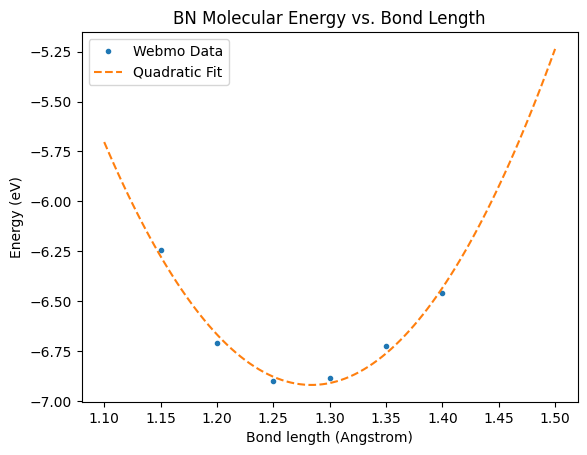

L_equilibrium = 1.283811 A < 1.325 A (in literature).


In [4]:
#Boron Nitride
#From https://cccbdb.nist.gov/bondlengthmodel2.asp?method=12&basis=5, L= 1.325 Angstrom
import numpy as np
import matplotlib.pyplot as plt

E_B = -24.61703 # Ha, energy of single B atom
E_N = -54.51279 # Ha, energy of single N atom
length = [1.15, 1.2, 1.25, 1.3, 1.35, 1.4] # Angstrom
E_BN = [-79.359357,-79.376368,-79.383355,-79.382896,-79.377003,-79.367236] # Ha, energy of BN
E_bond = [] # energy of BN bond
for i in E_BN:
    E_bond.append((i-E_B-E_N)*27.212)
fit = np.polyfit(length, E_bond, 2) # quadratic fit
print("Fitted result: E = %fx^2 + (%f)x + %f"%(fit[0],fit[1],fit[2]))

# Find E_min
x = np.linspace(1.1, 1.5, 100)
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
E_min_BN = min(z) # Find the minimum in energy array
print('E_min_BN = %feV.'%(E_min_BN))

# Plot E vs length
plt.plot(length, E_bond, '.', label='Webmo Data')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('BN Molecular Energy vs. Bond Length')
plt.legend()
plt.show()

# Find equilbrium bond length
import sympy as sp
x = sp.symbols('x')
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
l = sp.solve(sp.diff(z,x),x)
print('L_equilibrium = %f A < 1.325 A (in literature).'%(l[0])) # equilibrium bond length

Fitted result: E = 26.920637x^2 + (-72.138820)x + 40.931304
E_min_BeO = -7.395854eV.


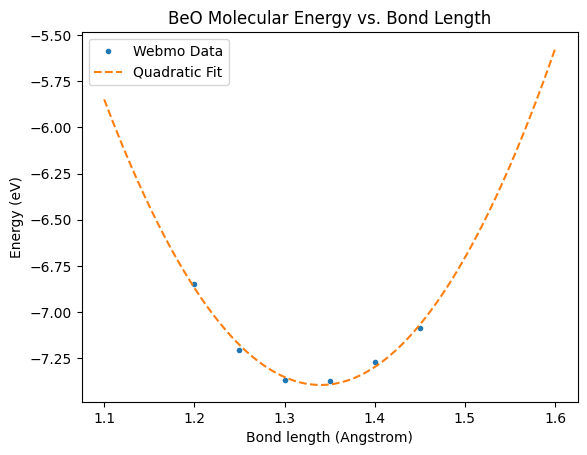

L_equilibrium = 1.339842 A > 1.331 A (in literature).


In [5]:
#Berrylium Oxide
#From https://cccbdb.nist.gov/bondlengthmodel2.asp?method=12&basis=5, L = 1.331 Angstrom
import numpy as np
import matplotlib.pyplot as plt

E_Be = -14.64102 # Ha
E_O = -74.98784 # Ha
length = [1.2, 1.25, 1.3, 1.35, 1.4, 1.45] # Angstrom
E_BeO = [-89.880569,-89.893740,-89.899599,-89.899934,-89.896149,-89.889335] # Ha, energy of BeO
E_bond = [] # energy of BeO bond
for i in E_BeO:
    E_bond.append((i-E_Be-E_O)*27.212)
fit = np.polyfit(length, E_bond, 2) # quadratic fit
print("Fitted result: E = %fx^2 + (%f)x + %f"%(fit[0],fit[1],fit[2]))

# Find E_min
x = np.linspace(1.1, 1.6, 100)
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
E_min_BeO = min(z) # Find the minimum in energy array
print('E_min_BeO = %feV.'%(E_min_BeO))

# Plot E vs length
plt.plot(length, E_bond, '.', label='Webmo Data')
plt.plot(x, z, '--',label='Quadratic Fit')
plt.xlabel('Bond length (Angstrom)')
plt.ylabel('Energy (eV)')
plt.title('BeO Molecular Energy vs. Bond Length')
plt.legend()
plt.show()

# Find equilbrium bond length
import sympy as sp
x = sp.symbols('x')
z = fit[0]*x**2 + fit[1]*x + fit[2] # from result above
l = sp.solve(sp.diff(z,x),x)
print('L_equilibrium = %f A > 1.331 A (in literature).'%(l[0])) # equilibrium bond length

### 7. Use the quadratic fit from Question 6 to determine the harmonic vibrational frequency of your molecule, in cm$^{-1}$. Recall that the force constant is the second derivative of the energy at the minimum, and that the frequency (in wavenumbers) is related to the force constant according to $$\tilde{\nu} = \frac{1}{2\pi c}\sqrt{\frac{k}{\mu}}$$

In [6]:
print('CO Molecule:')
J = 1.6022e-19 # J, 1 eV = 1.6022e-19 J
L = 1e-10 # m, 1 angstrom = 1e-10 m

# k [=] Energy/Length^2
k_CO = 2*71.30418671*J/L**2 # J/m**2
c = 2.99792e8 # m/s
m_C = 12.0107*1.6605e-27 # kg
m_O = 15.9994*1.6605e-27 # kg
mu_CO = m_C*m_O/(m_C+m_O) # kg, reduced mass

nu_CO = 1/(2*np.pi*c)*np.sqrt(k_CO/mu_CO)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is %f cm^-1.'%(nu_CO))

CO Molecule:
The harmonic vibrational frequency is 2377.567475 cm^-1.


In [7]:
print('BN Molecule:')
J = 1.6022e-19 # J, 1 eV = 1.6022e-19 J
L = 1e-10 # m, 1 angstrom = 1e-10 m

# k [=] Energy/Length^2
k_BN = 2*36.0384*J/L**2 # J/m**2
c = 2.99792e8 # m/s
m_B = 10.811*1.6605e-27 # kg
m_N = 14.0067*1.6605e-27 # kg
mu_BN = m_B*m_N/(m_B+m_N) # kg, reduced mass

nu_BN = 1/(2*np.pi*c)*np.sqrt(k_BN/mu_BN)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is %f cm^-1.'%(nu_BN))

BN Molecule:
The harmonic vibrational frequency is 1792.324670 cm^-1.


In [8]:
print('BeO Molecule:')
J = 1.6022e-19 # J, 1 eV = 1.6022e-19 J
L = 1e-10 # m, 1 angstrom = 1e-10 m

# k [=] Energy/Length^2
k_BeO = 2*26.920637*J/L**2 # J/m**2
c = 2.99792e8 # m/s
m_Be = 9.01218*1.6605e-27 # kg
m_O = 15.9994*1.6605e-27 # kg
mu_BeO = m_Be*m_O/(m_Be+m_O) # kg, reduced mass

nu_BeO = 1/(2*np.pi*c)*np.sqrt(k_BeO/mu_BeO)/100 # cm^-1, wavenumber
print('The harmonic vibrational frequency is %f cm^-1.'%(nu_BeO))

BeO Molecule:
The harmonic vibrational frequency is 1593.677593 cm^-1.


### 8. Use your results to determine the zero-point-corrected bond energy of your molecule. How does this model compare with the experimental value?

In [9]:
# Get experimental vibrational zero-point energy from NIST database: https://cccbdb.nist.gov/exp1x.asp
nu_CO_exp = 1084.9 # cm^-1
nu_BN_exp = 760.2 # cm^-1
nu_BeO_exp = 728.5 # cm^-1

In [10]:
print('CO Molecule:')
# Note: E_ZPC = E_min + ZPE_harmonic_oscillator
h = 6.62607e-34
NA = 6.02214e23
J = 1.6022e-19 # eV to J
E_min_CO = (-16.300903*J)*NA/1000 # converted from eV to kJ/mol from problem 8

# Calculations
E0_CO = (0.5*h*nu_CO*100*c)*NA/1000 # kJ/mol, ZPE harmonic oscillator
EB_CO = E_min_CO + E0_CO # kJ/mol, ZPC bond energy
# Experiments
E0_CO_exp = (0.5*h*nu_CO_exp*100*c)*NA/1000
EB_CO_exp = E_min_CO + E0_CO_exp
print('|E_ZPC| = %f kJ/mol < %f kJ/mol.'%(-EB_CO,-EB_CO_exp))

CO Molecule:
|E_ZPC| = 1558.599791 kJ/mol < 1566.331647 kJ/mol.


In [11]:
print('BN Molecule:')
# Note: E_ZPC = E_min + ZPE_harmonic_oscillator
h = 6.62607e-34
NA = 6.02214e23
J = 1.6022e-19 # eV to J
E_min_BN = (-4.633537*J)*NA/1000 # converted from eV to kJ/mol from problem 8

# Calculations
E0_BN = (0.5*h*nu_BN*100*c)*NA/1000 # kJ/mol, ZPE harmonic oscillator
EB_BN = E_min_BN + E0_BN # kJ/mol, ZPC bond energy
# Experiments
E0_BN_exp = (0.5*h*nu_BN_exp*100*c)*NA/1000
EB_BN_exp = E_min_BN + E0_BN_exp
print('|E_ZPC| = %f kJ/mol < %f kJ/mol.'%(-EB_BN,-EB_BN_exp))

BN Molecule:
|E_ZPC| = 436.354356 kJ/mol < 442.527822 kJ/mol.


In [12]:
print('BeO Molecule:')
# Note: E_ZPC = E_min + ZPE_harmonic_oscillator
h = 6.62607e-34
NA = 6.02214e23
J = 1.6022e-19 # eV to J
E_min_BeO = (-5.850784*J)*NA/1000 # converted from eV to kJ/mol from problem 8

# Calculations
E0_BeO = (0.5*h*nu_BeO*100*c)*NA/1000 # kJ/mol, ZPE harmonic oscillator
EB_BeO = E_min_BeO + E0_BeO # kJ/mol, ZPC bond energy
# Experiments
E0_BeO_exp = (0.5*h*nu_BeO_exp*100*c)*NA/1000
EB_BeO_exp = E_min_BeO + E0_BeO_exp
print('|E_ZPC| = %f kJ/mol < %f kJ/mol.'%(-EB_BeO,-EB_BeO_exp))

BeO Molecule:
|E_ZPC| = 554.990706 kJ/mol < 560.165609 kJ/mol.


## Computational chemistry, part deux

### Diatomics are a little mundane.  These same methods can be used to compute the properties of much more complicated things.  As example, the OQMD database <http://oqmd.org/> contains results for many solids. We don't have time to get this complicated in class, but at least you can compute properties of some molecules.

### 9. Working with some of your classmates, compute the equilibrium structures of C$_2$H$_6$, C$_2$H$_4$, and C$_2$H$_2$.  Compare their equilibrium C-C bond lengths.  Do they vary in the way you expect?

1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select New Job-Creat New Job.
3. Use the available tools to sketch a molecule.  Make sure the bond distances and angles are in a plausible range.
4. Use the right arrow at the bottom to proceed to the Computational Engines.
5. Select Orca
5. Select "Geometry optimization," “B3LYP” functional and the default def2-SVP basis set.
6. Select the right arrow to run the calculation.
7. From the job manager window choose the completed calculation to view the results.

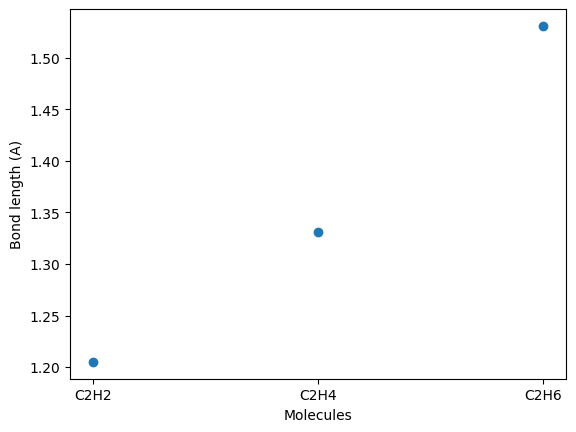

In [13]:
C2H6 = 1.531 # Angstrom
C2H4 = 1.331 # Angstrom
C2H2 = 1.205 # Angstrom

import matplotlib.pyplot as plt
import numpy as np
plt.scatter([0,1,2],[C2H2,C2H4,C2H6])
plt.xlabel('Molecules')
plt.ylabel('Bond length (A)')
plt.xticks(np.arange(3), ('C2H2','C2H4','C2H6'))
plt.show()

### 10. Compute the corresponding vibrational spectra.  Could you distinguish these molecules by their spectra?

1. Log into the Webmo server https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi using "guest" as your username and password.
2. Select the job with the optimized geometry and open it.
3. Use the right arrow at the bottom to proceed to the Computational Engines.
4. Select Orca
5. Select "Vibrational frequency," “B3LYP” functional and the default def2-SVP basis set.
6. Select the right arrow to run the calculation.
7. From the job manager window choose the completed calculation to view the results.

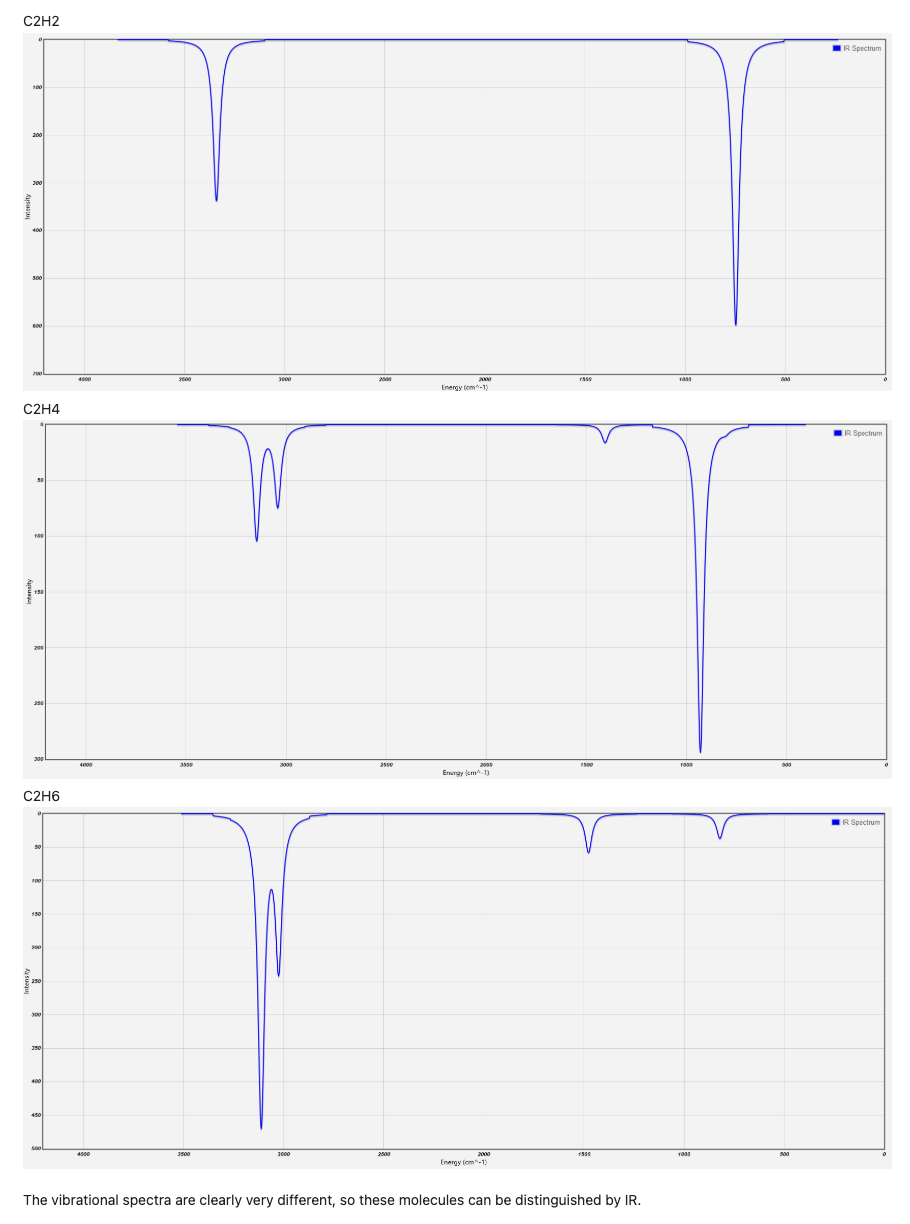

Yes, these spectra are easily distinguishable.

### 11. Compute the structure and energy of H$_2$.   Use it to compare the energies to hydrogenate acetylene to ethylene and ethylene to ethane.  Which is easier to hydrogenate?  Can you see why selective hydrogenation of acetylene to ethylene is difficult to do?

In [14]:
E_H2 = -1.16646206791 # Ha
E_C2H2 = -77.3256461775 # Ha, acetylene
E_C2H4 = -78.5874580928  # Ha, ethylene
E_C2H6 = -79.8304174812 # Ha, ethane

E_rxn1 = (E_C2H4 - E_C2H2 - E_H2)*2625.50 # kJ/mol, H2 + C2H2 -> C2H4
E_rxn2 = (E_C2H6 - E_C2H4 - E_H2)*2625.50 # kJ/mol, H2 + C2H4 -> C2H6
print("E_rnx1 = %f kJ/mol, E_rnx2 = %f kJ/mol"%(E_rxn1, E_rxn2))

E_rnx1 = -250.341024 kJ/mol, E_rnx2 = -200.843715 kJ/mol


Thermodynamics is more favorable for acetylene hydrogenation than it is for ethylene. Conditions/catalysts that will hydrogenate acetylene will have a hard time not subsequently hydrogenated the produced ethylene.

## The two-state system.
### Consider a closed system containing $N$ objects, each of which can be in one of two energy states, of energy either 0 or $\varepsilon$. The total internal energy $U$ of the box is the sum of the energies of the individual objects.

![Boltzmann](imgs/Boltzmann.png)

### 12. Write down all the possible microstates for a box in which $N = 4$ and the internal energy $U = 2\varepsilon$.

$$N = 4$$
$$q = 2$$
To find the number of microstates,
$$\Omega = \frac{N!}{(q!)(N-q)!} = 6$$

Possible Microstates:
$$(00\varepsilon\varepsilon)\qquad(0\varepsilon 0\varepsilon)\qquad(0\varepsilon \varepsilon 0)\qquad(\varepsilon 00\varepsilon)\qquad(\varepsilon 0\varepsilon 0)\qquad(\varepsilon \varepsilon 00)$$

### 13. What does the postulate of *equal a priori probabilities* say about the relative likelihood of occurance of any one of these microstates?

The postulate of equal a priori probabilities states that each microstate has the same probability of occuring.

### 14. What is the entropy of the box? (Thank you, Ludwig Boltzmann.)

In [15]:
import numpy as np
k = 1.380649e-23 #J/K
omega = 6 #number of possible microstates
S = k*np.log(omega)
print("The entropy of the box is kln6 = {0:8.3e} J/K.".format(S))

The entropy of the box is kln6 = 2.474e-23 J/K.


### 15. Suppose two identical such boxes are brought into thermal contact and allowed to come to equilibrium. Calculate the change in internal energy $\Delta U$ and in entropy $\Delta S$ associated with this process.

In [16]:
from math import factorial
import numpy as np

k = 1.380649e-23 #J/K
epsilon = 1. # some amount of energy

def Omega(N,q):
    return factorial(N)/(factorial(q)*factorial(N-q))

def S(N,q):
    return k*np.log(Omega(N,q))

def U(N,q):
    return q*epsilon

#2 identical Boxes, separated
N = 4; q = 2

Sseparated = S(N,q)
Useparated = U(N,q)

#2 Boxes, Combined
N2 = N*2
q2 = q*2

Scombined = S(N2,q2)
Ucombined = U(N2,q2)

deltaS = Scombined - 2*Sseparated
deltaU = Ucombined - 2*Useparated
print('The change in entropy is',deltaS,"J/K")
print('The change in energy is',deltaU,"epsilon")
print('The energy of a closed system is constant (first law)')
print('The entropy change in any spontaneous process in a closed system is > 0')



The change in entropy is 9.180988685797155e-24 J/K
The change in energy is 0.0 epsilon
The energy of a closed system is constant (first law)
The entropy change in any spontaneous process in a closed system is > 0
